# Laboratory 1

## Coordinate systems. Geometrical transformations

One of the fundamental necessities in robotics, is the localisation of objects in three
dimensional space. These objects can be elements that compose the physical structure of
a robot, parts and components that the robots manipulate, tools or in general any body
that exists in the space of operation of the robot. (See figure 1.1).
These objects can be described fundamentally with roughly two attributes: their position and orientation. An immediate aspect of interest would be how to represent these
and, furthermore, how can we manipulate mathematically these properties

<figure>
    <img src="fig1-0.png" width=20%/>
    <figcaption><center>Figure 1.1: Coordinate systems in the space of operation of a robot</center></figcaption>
</figure>

For the description of position and orientation of a solid in space, we will attach on it a rigid Cartesian coordinate system. Since any coordinate system can serve as a reference system on which we can express the position and orientation of a body, there is the question of how to change or transform these attributes of a body from a Cartesian system of reference to another one. This exercise presents conventions and methodology for the description of positions and orientations, as well as the mathematical formalisation that is used for the manipulation of these quantities in several coordinate systems.

The manipulation using a robot assumes the fact that objects and tools will be displaced in space with the use of a mechanism. This fact determines the need to represent the position and orientation of such objects that we want to manipulate as well as the position of the mechanism of manipulation. To define and manipulate mathematically the quantities that represent the position and orientation it is necessary to define a coordinate system and the corresponding conventions used for their representation.

### 1.1 Cartesian coordinate systems


In robotics, the _standard_ Cartesian system is obtained through the application of the
rule of the right hand, that is presented in figure 1.2. The thumb of the right hand indicates
the positive direction of the Z axis, and the extended fingers indicate the positive direction
for the X axis. By flexing the fingers by 90◦
, we are obtaining the positive direction for
axis Y.
For the definition of positive directions of rotations, we use again the rule of the right
hand. When the thumb is pointing the positive direction of an axis, the rest of the fingers
indicate the positive rotation around that axis. 

<center>
    <figure class="image">
      <img src="artwork/transformations/R3-right_hand_rule.png" style="height: 400px" />
      <figcaption>1.2 Rule of the right hand</figcaption>
    </figure>
</center>


Try changing the z coordinates to see how the other axes change:

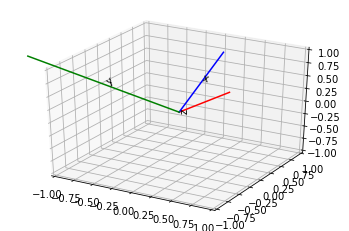

In [2]:
%matplotlib inline
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math as m
from lab1_functions import showAxes

### change position for axis Z from the next 3 vectors:
### requirements: positive values, (0,0,0) origin
Zx = np.linspace(0,1)
Zy = np.linspace(0,-0.7)
Zz = np.linspace(0,1)
Z  = np.array([Zx,Zy,Zz])

showAxes(Z)




The position of a point can be described using the Cartesian coordinates of an object expressed relative to the origin of a coordinate system $(x_1,y_1,z_1)$ or through a vector of position $p_1$. For example, the position of a parallelepiped
in a coordinate system can be described using 8 position vectors, one for each one of the vertices. In the case that the object is moving, the calculation of the new position assumes the calculation of a new set of 8 vectors of position. This situation can become even more complicated if we are talking about irregular objects (a particular case, when for each position of the object it might be necessary to calculate more than 8 vector of position), or in the case in which we have more objects that move independently in relation to each other. An alternative and more efficient solution is to attach a different coordinate system on each object, which will displace together with the object itself. If the object is rigid (i.e. it does not deform), the position of every point belonging to the object remains the same in respect to the coordinate system attached on the object, independent of its the displacement. In this way, the problem of calculating the motion of an object is reduced to the calculation of the relation between two coordinate systems (reference system and the coordinate system attached on the object). Moreover, this relationship allows the calculation of the new position of any point belonging to the object of interest. The position of point $P$ is described by its Cartesian coordinates: $P(x,y,z)$.

### 1.2 Elementary Transformations. Homogeneous Transformations

A rigid solid, and its inertial coordinate system, have 6 degrees of freedom (DOF), or 6 independent ways in which the object can move. These elementary transformations are:


##### 1. Translation on X axis.  If the translation takes place with a distance ’d’, this is denoted as:Trans(X,d). 

<IPython.core.display.Javascript object>


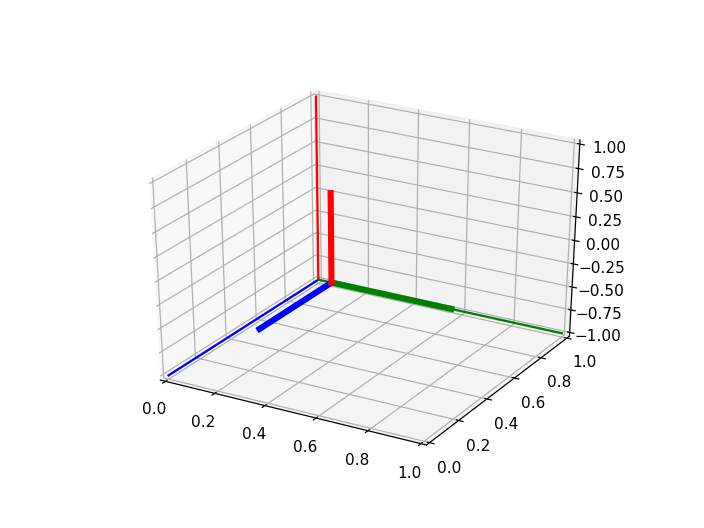

In [3]:
%matplotlib nbagg
from lab1_functions import TransX

#translate with d between [0,0.5]
d   = 0.2
animation = TransX(d)



##### 2. Translation on Y axis.  If the translation takes place with a distance ’d’, this is denoted as:Trans(Y,d). 

<IPython.core.display.Javascript object>


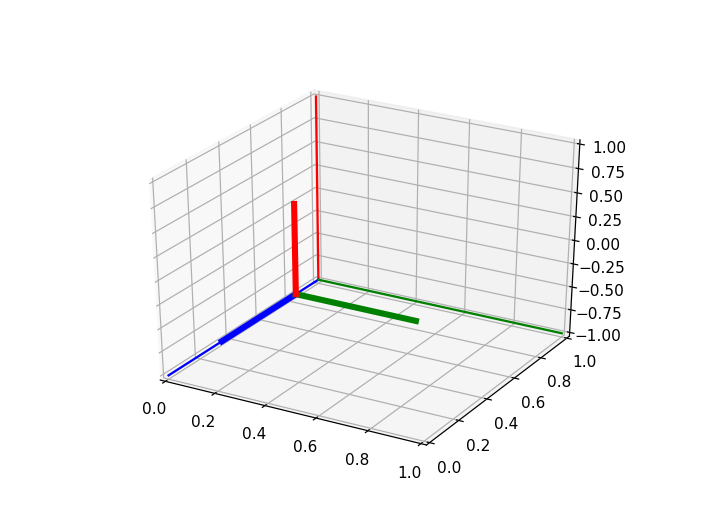

In [2]:
#translation on y using matplotlib by d = xcm
%matplotlib nbagg
from lab1_functions import TransY

#translate with d between [-0,-0.5]
d = -0.5
animation = TransY(d)


##### 3. Translation on Z axis.  If the translation takes place with a distance ’d’, this is denoted as:Trans(Z,d). 

<IPython.core.display.Javascript object>


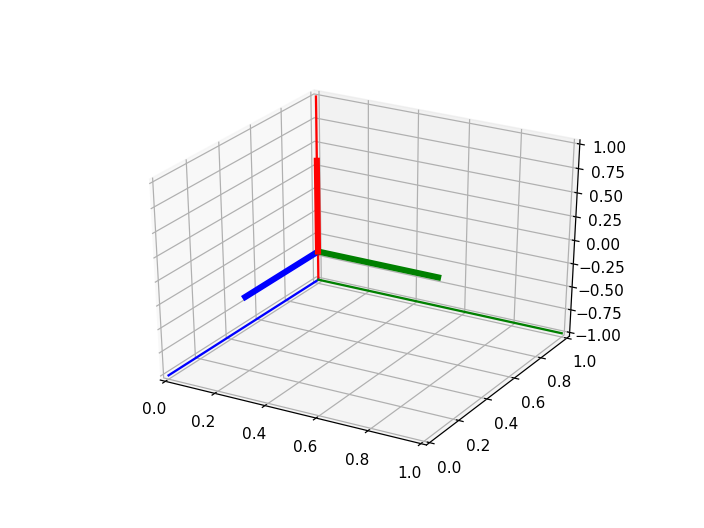

In [1]:
#translation on z using matplotlib by d = xcm
%matplotlib nbagg
from lab1_functions import TransZ

#translate with d between [0,1.5]
d = 1
animation = TransZ(d)


##### 4. Rotation on X axis.  If the rotation takes place with an angle '$\vartheta$', this is denoted as:Rot(X,$\vartheta$). 

<IPython.core.display.Javascript object>


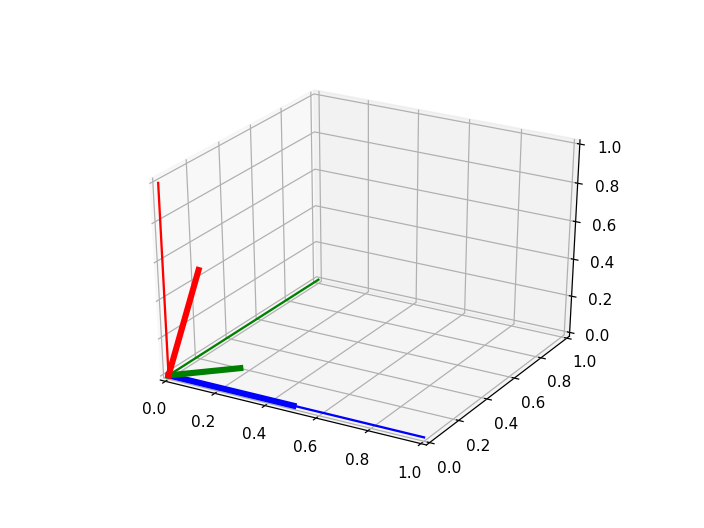

In [1]:
#rotation on x using matplotlib by theta [rad]
%matplotlib nbagg
from lab1_functions import RotX
import math

#translate with theta in rad
theta = math.pi/2
animation = RotX(theta)


##### 5. Rotation on Y axis.  If the rotation takes place with an angle '$\vartheta$', this is denoted as:Rot(Y,$\vartheta$). 

<IPython.core.display.Javascript object>


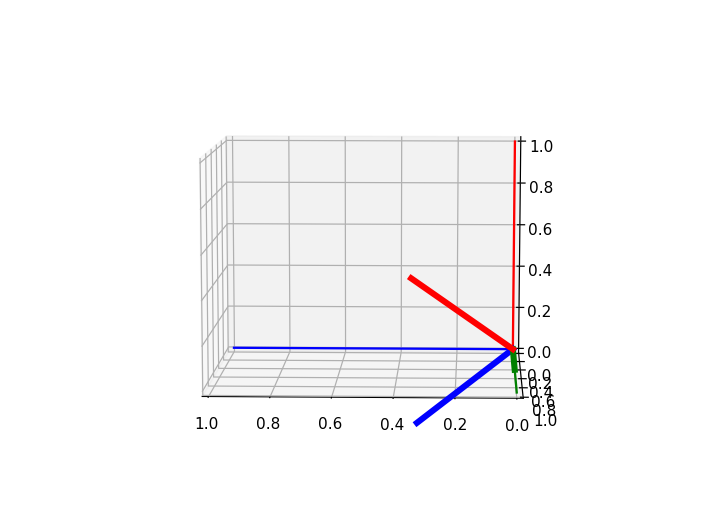

In [2]:
#rotation on y using matplotlib by theta [rad]
%matplotlib nbagg
from lab1_functions import RotY
import math

#translate with theta in rad
theta = math.pi/2
animation = RotY(theta)


##### 6. Rotation on Z axis.  If the rotation takes place with an angle ’$\vartheta$’, this is denoted as:Rot(Z,$\vartheta$). 

<IPython.core.display.Javascript object>


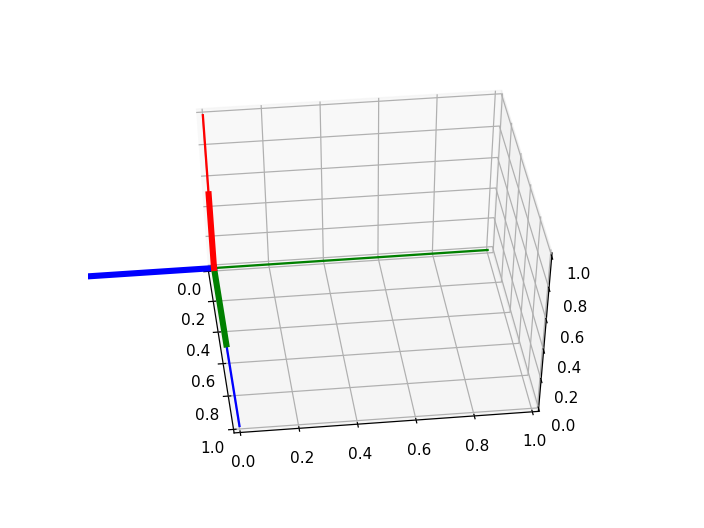

In [2]:
#rotation on z using matplotlib by theta [rad]
%matplotlib nbagg
from lab1_functions import RotZ
import math

#translate with theta in rad
theta = math.pi/2
animation = RotZ(theta)

The motion of a rigid object in respect to a reference coordinate system can be described as a succession of elementary rotations and translations applied on the coordinate system that is attached on the object. For the description of any translation in the three dimensional space, we need only three parameters. Therefore the matrix representation of a translation can be made using a vector with three elements $w = [w_{x}, w_{y}, w_z ]^T $. This transformation is finite, but it is not linear.


For the rotation, there are more than one methods of representation. One of the most popular methods is by using rotation matrices. Considering a Cartesian coordinate system on which we apply an arbitrary rotation, we express the orientation of the set of axes (represented by the vectors $u$, $v$, $w$) with respect to the original coordinate system (represented by the vectors $x$, $z$, $y$). This representation describes completely the rotation. The three vectors $u$,$v$,$w$, that form the expression of the new coordinate system, are each represented of the three components, resulting therefore in a total of 9 parameters that represent a rotation.

\begin{equation}\label{eq.1.1}
A = \left[ {\begin{array}{*{20}c}
   {\hat u_x } & {\hat v_x } & {\hat w_x }  \\
   {\hat u_y } & {\hat v_y } & {\hat w_y }  \\
   {\hat u_z } & {\hat v_z } & {\hat w_z }  \\
\end{array}} \right]
\end{equation}

Each one of the elements of the matrix represents the cosine of the angle between an axis of the new and one of the reference coordinate system ($x$, $z$ or $y$), that is why the matrix above is called as well *direction cosine matrix*. The rotation matrix is an orthogonal matrix, with real elements and a determinant of +1. The eigenvalues of the matrix are $\left\{ {1,e^{ \pm i \cdot \theta } } \right\}$ where $ e$ is the unit vector corresponding to the direction around which the rotation is made and $\theta $ is the angle of the rotation.


In the case that the rotation is happening with an angle $\varphi$ around one of the elementary axes ($x$, $y$ or $z$), the direction cosine matrix has the following form:


Rotation around $x$ axis:
$A_x  = \left( {\begin{array}{*{20}c}
   1 & 0 & 0  \\
   0 & {\cos \varphi } & { - \sin \varphi }  \\
   0 & {\sin \varphi } & {\cos \varphi }  \\
\end{array}} \right)$

Rotation around $y$ axis:
$A_y  = \left( {\begin{array}{*{20}c}
   {\cos \varphi } & 0 & {\sin \varphi }  \\
   0 & 1 & 0  \\
   { - \sin \varphi } & 0 & {\cos \varphi }  \\
\end{array}} \right)$

Rotation around $z$ axis:
$A_z  = \left( {\begin{array}{*{20}c}
   {\cos \varphi } & { - \sin \varphi } & 0  \\
   {\sin \varphi } & {\cos \varphi } & 0  \\
   0 & 0 & 1  \\
\end{array}} \right)$

Therefore, a $3 \times 3$ matrix can be used for describing a rotation, but not for a translation.



The *homogeneous coordinates* were introduced by M&ouml;bius to allow the description of finite transformations using matrices. Furthermore, homogeneous coordinates allow to work the same way for rotational transformations as well as translational transformations.

In principle, the coordinates of a point in $n$-dimensional space can be represented through a vector of $n+1$ dimensions, by adding a non-zero scaling factor. The homogeneous coordinates of a point in three dimensional space are obtained through its Cartesian coordinates by adding a scaling factor, which for the robotics applications equals 1. Therefore, a point $P(x, y, z)$ has homogeneous coordinates:

\begin{equation}
\left[ {\begin{array}{*{20}c}
   x  \\
   y  \\
   z  \\
   1  \\
\end{array}}
\right]
\end{equation}

Geometrical transformations are represented in this case through a $4 \times 4$ matrix:


$
\begin{equation}
T = \left[ {\begin{array}{ccc|c}
   {} & {} & {} & {}  \\
   3 &  \times  & 3 & {3 \times 1}  \\
   {} & {} & {} & {}  \\ \hline
   1 &  \times  & 3 & {1 \times 1}  \\
\end{array}} \right] = \left[ {\begin{array}{ccc|c}
   {} & {} & {} & {trans - }  \\
   {} & {rotation} & {} & {la - }  \\
   {} & {} & {} & {tion}  \\ \hline
   0 & 0 & 0 & 1  \\
\end{array}} \right] = \left[ {\begin{array}{*{20}c}
   X & Y & Z & P  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]\,
\end{equation}
$

where $
X = \left[ {\begin{array}{*{20}c}
   {X_X }  \\
   {X_Y }  \\
   {X_Z }  \\
\end{array}} \right]
$ represents the direction of $X$ axis of the new coordinate system,


where $
Y = \left[ {\begin{array}{*{20}c}
   {Y_X }  \\
   {Y_Y }  \\
   {Y_Z }  \\
\end{array}} \right]
$ represents the direction of $Y$ axis of the new coordinate system,


where $
Z = \left[ {\begin{array}{*{20}c}
   {Z_X }  \\
   {Z_Y }  \\
   {Z_Z }  \\
\end{array}} \right]
$ represents the direction of $Z$ axis of the new coordinate system,


$
P = \left[ {\begin{array}{*{20}c}
   {P_X }  \\
   {P_Y }  \\
   {P_Z }  \\
\end{array}} \right]
$
 represents the position of the origin of the new coordinate system.

The matrix $T$ therefore describes the position (through vector $P$) and the orientation (through vectors $X$, $Y$ and $Z$) of the new coordinate system with respect to the reference system. Through the multiplication of two homogeneous transformation matrices, the result is still a homogeneous transformation matrix.


The following homogeneous transformation matrices are associated to elementary geometrical transformations:
\begin{equation}
   Trans(X,a) = \left[ {\begin{array}{*{20}c}
   1 & 0 & 0 & a  \\
   0 & 1 & 0 & 0  \\
   0 & 0 & 1 & 0  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}

\begin{equation}
Trans(Y,b) = \left[ {\begin{array}{*{20}c}
   1 & 0 & 0 & 0  \\
   0 & 1 & 0 & b  \\
   0 & 0 & 1 & 0  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}

\begin{equation}
Trans(Z,c) = \left[ {\begin{array}{*{20}c}
   1 & 0 & 0 & 0  \\
   0 & 1 & 0 & 0  \\
   0 & 0 & 1 & c  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}


\begin{equation}
Rot(X,\vartheta ) = \left[ {\begin{array}{*{20}c}
   1 & 0 & 0 & 0  \\
   0 & {\cos \vartheta } & { - \sin \vartheta } & 0  \\
   0 & {\sin \vartheta } & {\cos \vartheta } & 0  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}

\begin{equation}
Rot(Y,\varphi ) = \left[ {\begin{array}{*{20}c}
   {\cos \varphi } & 0 & {\sin \varphi } & 0  \\
   0 & 1 & 0 & 0  \\
   { - \sin \varphi } & 0 & {\cos \varphi } & 0  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}



\begin{equation}
Rot(Z,\omega ) = \left[ {\begin{array}{*{20}c}
   {\cos \omega } & { - \sin \omega } & 0 & 0  \\
   {\sin \omega } & {\cos \omega } & 0 & 0  \\
   0 & 0 & 1 & 0  \\
   0 & 0 & 0 & 1  \\
\end{array}} \right]
\end{equation}

A matrix of a transformation can be understood in different ways:

<ul>
  <li> as a transformation from one coordinate system to another one
</li>
  <li>as a description of the origin and orientation of the new coordinate system with respect to the reference coordinate system
</li>
  <li> as a description of the displacement of an object from a position (reference system) to another one (new coordinate system)</li>
    <li>as a method that allows the calculation of the position of a point, that is part of an object, with respect to a system of reference, knowing its position with respect to the new coordinate system:</li>
</ul>
$
      \begin{equation}\label{eq.1.9}
^R q = ^R T_N  \cdot ^N q
      \end{equation}$
<br>
where:

<br>$^R q$ is the vector of position of a point in the system $R$ (reference system);
<br>$^R T_N$ is the transformation of the new coordinate system in respect to the reference system, known as \emph{direct transformation}. In other words, it is the transformation that is applied on system $R$ so that it arrives at the position of system $N$.
<br>$^N q$ is the vector of position of a point in the coordinate system $N$(new coordinate system).
 



<center>
    <figure>
        <img src="artwork/transformations/swap_coordinates.png" style="height: 400px" />
        <figcaption>Figure 1.3: Calculation of the position of a point in the reference coordinate system, using direct transformation and the coordinates of the point in its own coordinate system</figcaption>
        </figure>
</center>

### 1.3 Combination of transformations


As it was shown, a geometrical transformation can be decomposed in a succession of elementary rotations and translations. The combination of a succession of elementary geometrical transformations in a general transformation, can be therefore done:

<ul>

<li>Using <b>LEFT MUTIPLICATION</b> of homogeneous transformation matrices if the transformations are made in respect to a reference coordinate system.
    (<b>ABSOLUTE TRANSFORMATIONS</b>). In these conditions, if we have a succession of $n$ absolute transformations$(T_i, \;\;i=\overline{1\ldots n})$, the transformation matrix can be written as:</li>
    
\begin{equation}
T_A=\prod \limits_{i=n}^1 T_i=T_n\cdot T_{n-1}\cdot\ldots\cdot T_1
\end{equation}

</ul>



You can see a visualisation of an 'absolute' transformation in the following animation. Notice how the 'small' coordinate frame is transformed around the blue axis of the 'big' coordinate frame:

|Rotation|Translation|
|--|--|
|<video controls src="artwork/transformations/cf_left_multipl2.mp4" width=400 />|<video controls src="artwork/transformations/cf_left_multipl3.mp4" width=400 />|

<ul>
    <li>Using <b>RIGHT MULTIPLICATION</b> of homogeneous transformation matrices if transformations are made in respect to a new coordinate system (the system that is obtained as a result of the last transformation). (<b>RELATIVE TRANSFORMATIONS</b>). In these conditions, if we have a succession of $n$ relative transformations $(T_i, \;\;i=\overline{1\ldots n})$, the transformation matrix can be written as:

\begin{equation}
T_r=\prod \limits_{i=1}^n T_i=T_1\cdot T_2\cdot\ldots\cdot T_n
\end{equation}


You can see a visualisation of an 'relative' transformation in the following animation. Notice how the 'small' coordinate frame is transformed around the blue axis of its own coordinate frame:

|Rotation|Translation|
|--|--|
|<video controls src="artwork/transformations/cf_right_multipl2.mp4" width=400 />|<video controls src="artwork/transformations/cf_right_multipl3.mp4" width=400 />|

### Swapping coordinate frames

With the help of direct geometrical transformations it is possible to determine the position of a point in the reference system  ${ }^Rq$ if we know its position in another coordinate system ${}^Nq$ with direct geometrical transformation $^R T_N$. If we want to find ${}^Nq$, with given ${}^Rq$ and $^R T_N$, we must proceed as following:


\begin{equation}
{ }^Rq = T \cdot { }^Nq \to T^{ - 1} \cdot { }^Rq = T^{ - 1} \cdot T \cdot {
}^Nq \to { }^Nq = T^{ - 1} \cdot { }^Rq
\end{equation}


<br>
Therefore, the inverse geometric transformation is described with the inverse matrix of the direct transformation.
<br>

Denoted

\begin{equation}\label{eq.1.11}
T = \left[ \begin{array}{cccc}
 {X_X } & {Y_X } & {Z_X } & {P_X } \\
 {X_Y } & {Y_Y } & {Z_Y } & {P_Y } \\
 {X_Z } & {Y_Z } & {Z_Z } & {P_Z } \\
 0 & 0 & 0  & 1 \\
\end{array} \right]
\end{equation}


<br>
it can be demonstrated that the inverse of a homogeneous transformation matrix, is:
<br>

\begin{equation}
T^{ - 1} = \left[
\begin{array}{cccc}
 {X_X } & {X_Y } & {X_Z } & { - P_X\cdot X_X - P_Y \cdot X_Y - P_Z\cdot X_Z }  \\
 {Y_X } & {Y_Y } & {Y_Z } & { - P_X \cdot Y_X - P_Y \cdot Y_Y - P_Z\cdot Y_Z }  \\
 {Z_X } & {Z_Y } & {Z_Z } & { - P_X\cdot Z_X - P_Y \cdot Z_Y - P_Z\cdot Z_Z }  \\
 0  & 0 & 0  & 1
\end{array} \right]
\end{equation}


### 1.4 Proposed Problems + Matlab/Python commands

There are several toolboxes available online for helping us with various robotics operations. One of the most developed ones is [robopy](https://github.com/adityadua24/robopy), which we will use extensively during the laboratories. This toolbox offers a very easy way to calculate various transformation matrices, using the _trotx_, _troty_, _trotz_, and _transl_ commands. You can see an example of how are these used below:

In [ ]:
from robopy import *

t1 = trotx(45, 'deg')
t2 = trotz(45, 'deg')
t3 = transl(2, 0 ,-1)

print(t2)

The matrices obtained using this method can be combined to calculate more complex transformations by multiplication:

In [ ]:
# Calculate coordinate '3' frame after three consecutive transformations
t13 = t1*t2*t3
print(t13)

# You can also visualise the coordinate frame if you use the 'pose' class
p1 = pose.SE3.Rx(theta=45, unit='deg')
p3 = pose.SE3.Ry(theta=45, unit='deg')
p2 = pose.SE3.Rx(theta=0, x=2, y=0, z=-1, unit='deg')
(p1*p2*p3).plot()

We can also define a point by its coordinates on a coordinate frame, and find out what are its coordinates on another frame if we know the transformation between the two frames. For defining the point we use the [numpy](https://numpy.org/) library. By default, numpy creates row vectors, that's why we need to transpose the vector into a column before we do the multiplication. We do that using the __T__ method:

In [ ]:
import numpy as np

# Define point P with coordinates 1,2,3
P=np.array([[1,2,3,1]]).T

# Calculating coordinates of point P in frame '3'
t13*P

# Assignments

## Transforming a point

A point with coordinates $P(1, 2, 3)$ is given. We apply the following transformations on the point, with the specified order: $Trans(X,4),\;\; Trans(Y,-4),\;\; Rot(X, 90^\circ), \;\;Trans(Z,4),\;\; Rot(Y, 90^\circ)$. Determine the new coordinates of the point if we consider Absolute transformations.

## Understanding the general transformation matrix

Two coordinate frames ($A$ and $B$) are given in the figure below. Calculate the transformation matrix that expressed frame $A$ using frame $B$ as basis.

<center>
    <figure class="image">
      <img src="artwork/transformations/general_matrix.png" style="height: 400px" />
      <figcaption>Two coordinate frames. The origin of frame $B$ has coordinates $(3,2,1)$ on frame $A$</figcaption>
    </figure>
</center>

## Transforming a coordinate frame

Consider the figure below, describing three coordinate frames. Frame $A$ is the basis coordinate frame, where frames $B$ and $C$ are expressed in (given below). What is the sequence of transformations that transform frame $B$ onto frame $C$?

<center>
    <figure class="image">
      <img src="artwork/transformations/matrix_transformations.png" style="height: 400px" />
      <figcaption>Three coordinate frames. The coordinates of the origins of frames $B$ and $C$ are calculated based on frame $A$</figcaption>
    </figure>
</center>

If point $P$ has coordinates $(3,1,0)$ on frame $A$, what are its coordinates on frame $B$?